In [6]:
import numpy as np

import scipy.io

import statsmodels.api as sm

import matplotlib.pyplot as plt

In [62]:
def load_ts(files_dict):
    """Load ts from mat files
    """
    mat_files = {}
    for file_name, json_desc in files_dict.items():
        
        action = json_desc['action']
        data_field = json_desc['data_field']
        
        if action == 'flatten':
            mat_files[file_name] = scipy.io.loadmat(
                f'data/{file_name}.mat'
            )[data_field].flatten()
        elif action == 'split':
            mat = scipy.io.loadmat(
                f'data/{file_name}.mat'
            )
            mat = mat[data_field]
            for column in range(mat.shape[1]):
                
                mat_files[f'{file_name}_{column}'] = mat[:, column]

        else:
            mat_files[file_name] = scipy.io.loadmat(
                f'data/{file_name}.mat'
            )[data_field].flatten()
    
    return mat_files


def show_ts(ts_dict):
    """Plot a series of ts data
    """
    fig, axs = plt.subplots(1, len(ts_dict), figsize=(5*len(ts_dict), 5))
    ax_index = 0
    for name, ts in ts_dict.items():
        
        axs[ax_index].plot(
            ts
        )
        axs[ax_index].set_title(name)
        
        ax_index += 1
    
    plt.show()
    return None 

def difference(ts_dict, lag=1):
    """Compute the lag differentiation for all the ts in ts_dict
    """
    differenced_ts = {}
    for key, value in ts_dict.items():
        
        differenced_ts[key] = np.array(
            [value[i+1] - value[i] for i in range(len(value) - 1)]
        )
    
    return differenced_ts

def moving_statistic(ts_dict, statistic, window=10):
    """Compute a moving statistic for for all the ts in ts_dict
    """
    moving_stat_ts = {}
    for key, value in ts_dict.items():
        
        moving_stat_ts[key] = np.array(
            [statistic(value[i: i+window]) for i in range(len(value) - window)]
        )
        
    return moving_stat_ts

def compute_acf_pacf(ts_dict):
    """Plot acf and pacf for a set of ts
    """
    fig, axs = plt.subplots(2, len(ts_dict), figsize=(5*len(ts_dict), 10))
    ax_index = 0
    for name, ts in ts_dict.items():
        
        
        sm.graphics.tsa.plot_acf(
            ts,
            ax=axs[0][ax_index]
        )
        axs[0][ax_index].set_title(f'{name} acf')

        sm.graphics.tsa.plot_pacf(
            ts,
            ax=axs[1][ax_index]
        )
        axs[1][ax_index].set_title(f'{name} pacf')
                
        ax_index += 1
    
    plt.show()
    return None 

# Exercise 1
1. Transform non stationary time series in stationary ones
2. Compute the Autocorrelation Function ACF and Partial Autocorrelation Function

In [55]:
time_series = load_ts(
        {
            'data_h02': {
                'action': 'flatten',
                'data_field': 'data'
            },
            'data_h05': {
                'action': 'flatten',
                'data_field': 'data'
            },
            'data_h08': {
                'action': 'flatten',
                'data_field': 'data'
            }
        }
)

### Before Differentiation

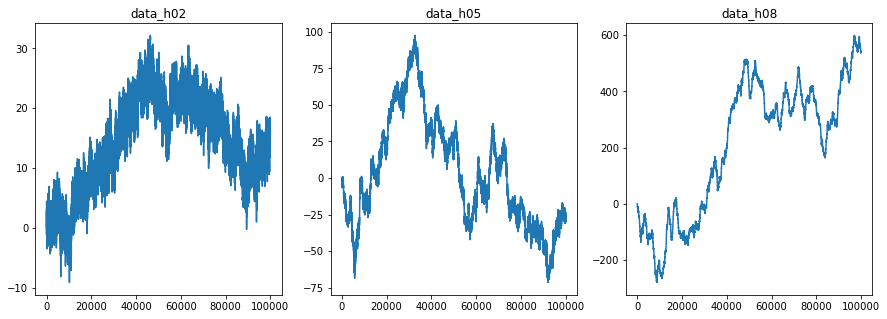

In [56]:
show_ts(time_series)

KeyboardInterrupt: 

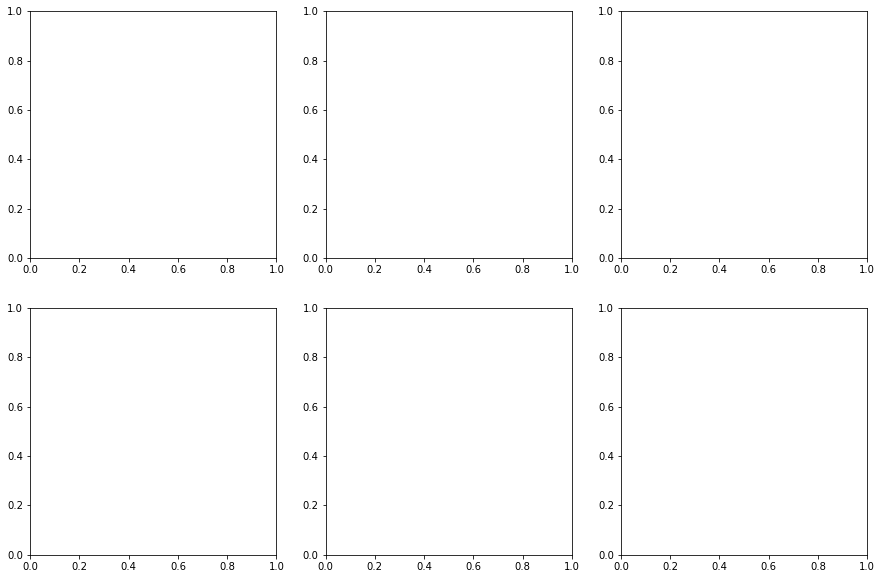

In [57]:
compute_acf_pacf(time_series)

### After Differentiation

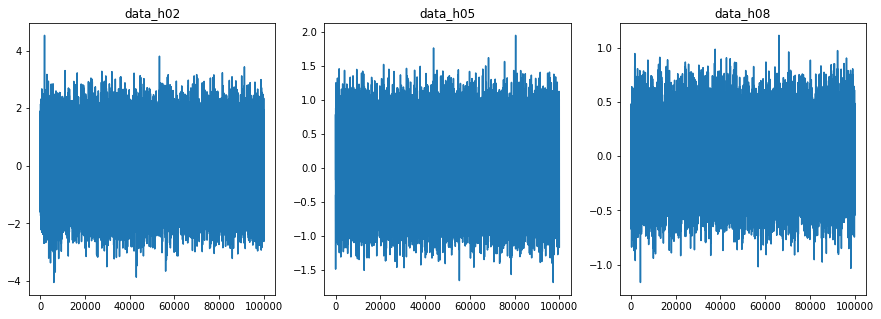

In [13]:
differenced_ts = difference(time_series)
show_ts(differenced_ts)

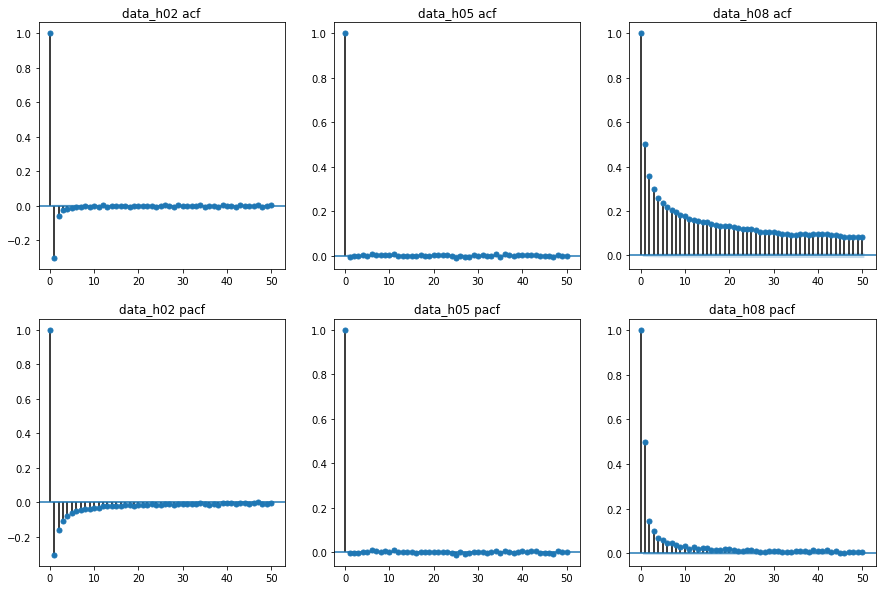

In [11]:
compute_acf_pacf(differenced_ts)

# Exercise 2

In [60]:
traces = load_ts(
        {
            'trace': {
                'action': 'split',
                'data_field': 'trace'
            }
        }
)

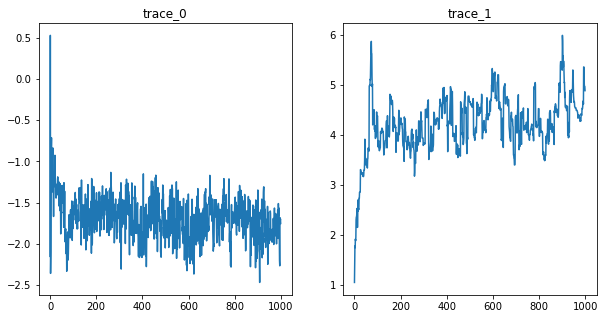

In [61]:
show_ts(traces)

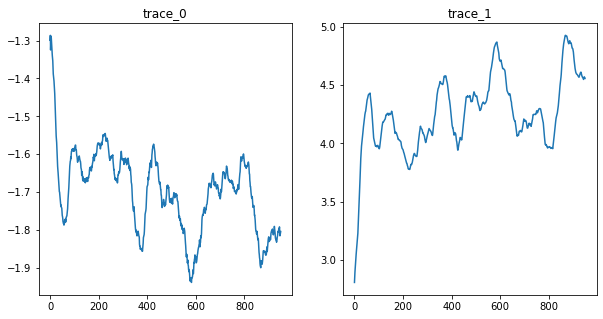

In [66]:
moving_average = moving_statistic(traces, np.mean, window=50)
show_ts(moving_average)